In [1]:
from agents import Producer, Consumer, Influencer
from content_market import ContentMarket
import numpy as np
from test import test

In [2]:
topics = np.array([[1, 10]])

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize

In [4]:
varied_param = 'consumer_attention_bound'
varied_param_legend_label = 'Consumer Bound'
varied_param_x_label = 'Consumer Attention Bound'

In [5]:
num_producers = 6
num_influencers = 1
num_consumers = 5

In [6]:
consumer_attention_bounds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]

In [7]:
stats, markets, tests = test(
    topics=topics,
    varied_param=varied_param,
    num_producers=num_producers,
    num_consumers=num_consumers,
    num_influencers=num_influencers,
    producer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_attention_bound=consumer_attention_bounds,
    consumer_external_interest_prob=.5,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    producer_type=Producer,
    consumer_type=Consumer,
    influencer_type=Influencer,
)

Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 0 / 100 done.
Total Social Welfare: 14.797977848741722
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 1 / 100 done.
Total Social Welfare: 15.006552653438002
Consumer rate change: 0.0
Consumer utility change: 0.021285789589642112
Influencer rate change: 0.10808345803739244
Influencer utility change: 0.101916314979138
Producer topic change: 1.4802973069549807e-08
Producer utility change: 3.825696148807012e-05
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing con

In [8]:
print(stats)

{'total_social_welfare': [[0, 14.797977848741722, 15.006552653438002, 15.00678219520693], [0, 24.397740742469768, 24.74162245957718, 24.742001010105675], [0, 27.246410775974027, 28.164344272745144, 28.163149581693958, 28.163063239615198], [0, 31.516246115833066, 31.828068062786997, 31.829838530864457, 31.829847471093075], [0, 35.02285603678732, 35.347547920598416, 35.34944471004503, 35.34947003678671], [0, 36.84938671596402, 37.185105305757226, 37.18843546138934, 37.18889216512802, 37.18901454433291, 37.18905657443674, 37.18905355743948], [0, 39.89706107370832, 40.2680121727049, 40.26973791309049, 40.26975869914682], [0, 41.757721589390954, 42.1683339461333, 42.17050523917524, 42.17054356082102, 42.17054346374972], [0, 43.84540143411371, 44.26435016304314, 44.26665674478352, 44.266693040952326], [0, 45.68996671089587, 46.13553368832342, 46.137900111900095, 46.137916175844445, 46.1379164976989], [0, 53.171756724849566, 53.72856928664323, 53.730252266057576, 53.73029782514425, 53.7302979

In [9]:
print(tests)

{'consumer_attention_bound': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 30, 40, 50]}


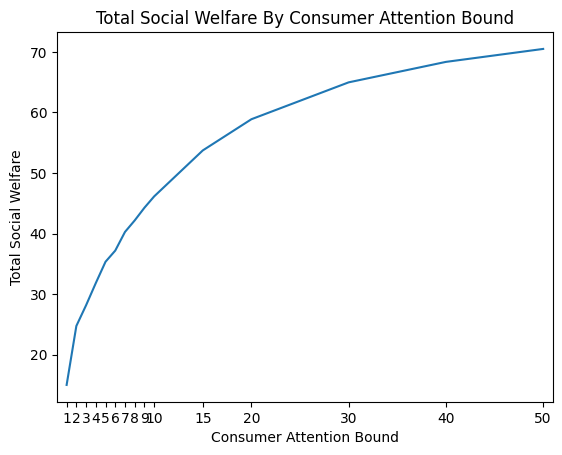

In [10]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", stats['total_social_welfare'], tests[varied_param], varied_param_x_label, 'Total Social Welfare')

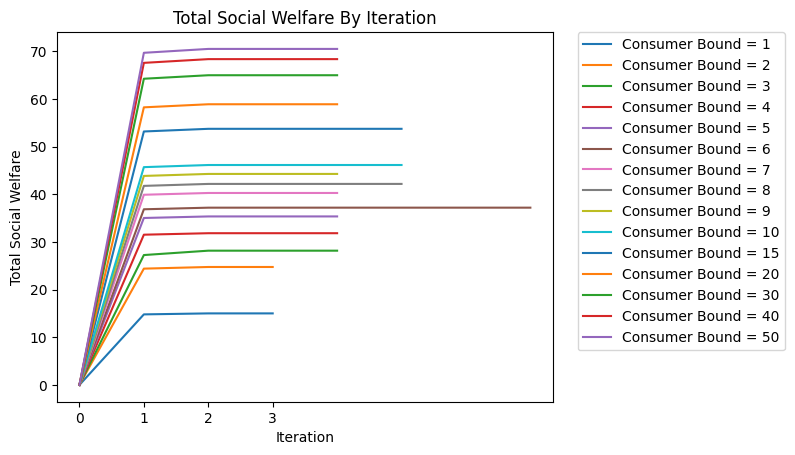

In [11]:
visualize.plot_value_by_iteration_by_test("Total Social Welfare By Iteration", stats['total_social_welfare'], tests[varied_param], varied_param_legend_label, 'Total Social Welfare')

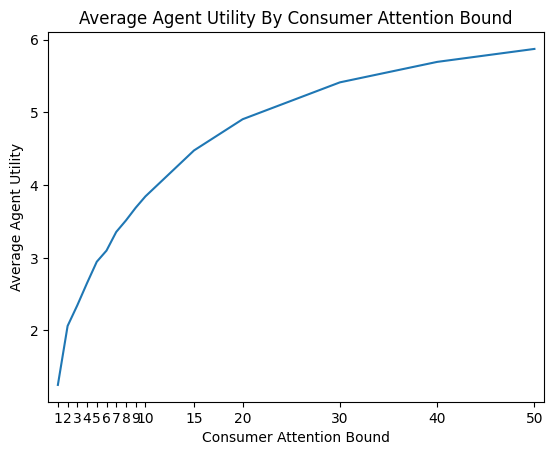

In [12]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", stats['average_agent_utilities'], tests[varied_param], varied_param_x_label, 'Average Agent Utility')

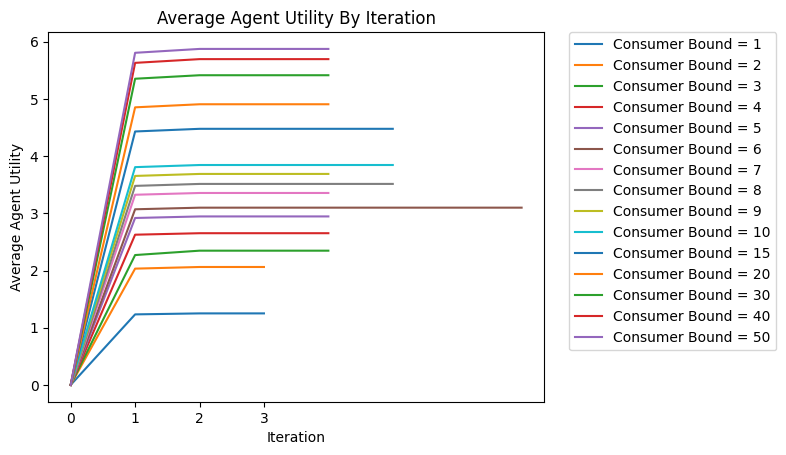

In [13]:
visualize.plot_value_by_iteration_by_test("Average Agent Utility By Iteration", stats['average_agent_utilities'], tests[varied_param], varied_param_legend_label, 'Average Agent Utility')

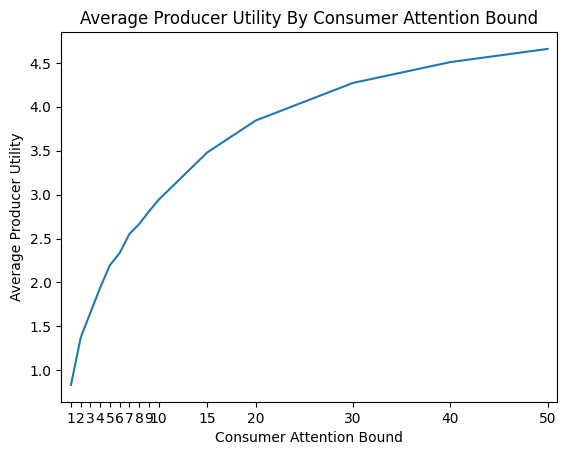

In [14]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", stats['average_producer_utilities'], tests[varied_param], varied_param_x_label, 'Average Producer Utility')

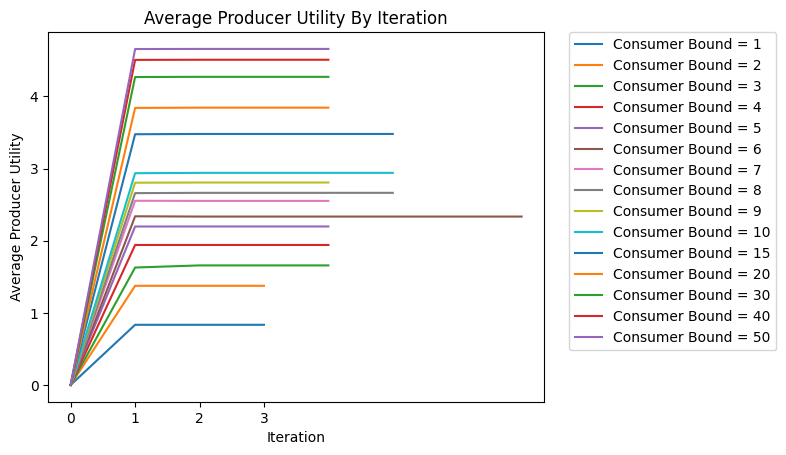

In [15]:
visualize.plot_value_by_iteration_by_test("Average Producer Utility By Iteration", stats['average_producer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Producer Utility')

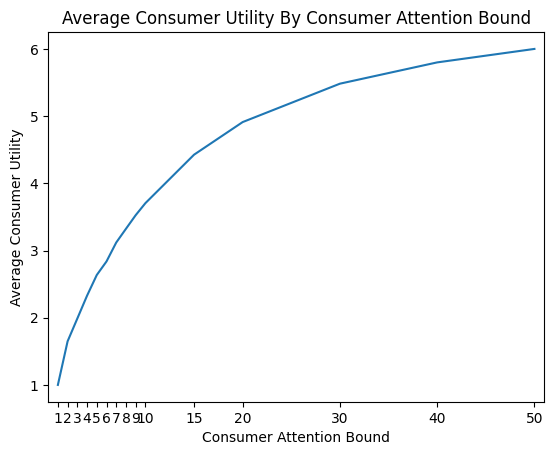

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", stats['average_consumer_utilities'], tests[varied_param], varied_param_x_label, 'Average Consumer Utility')

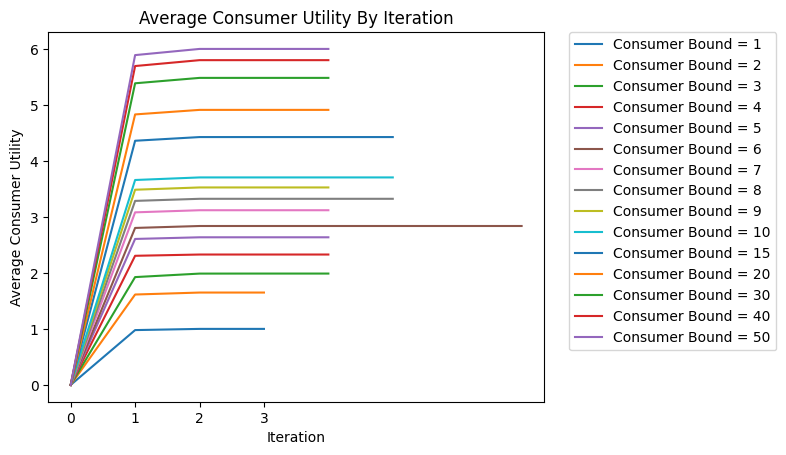

In [17]:
visualize.plot_value_by_iteration_by_test("Average Consumer Utility By Iteration", stats['average_consumer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Consumer Utility')

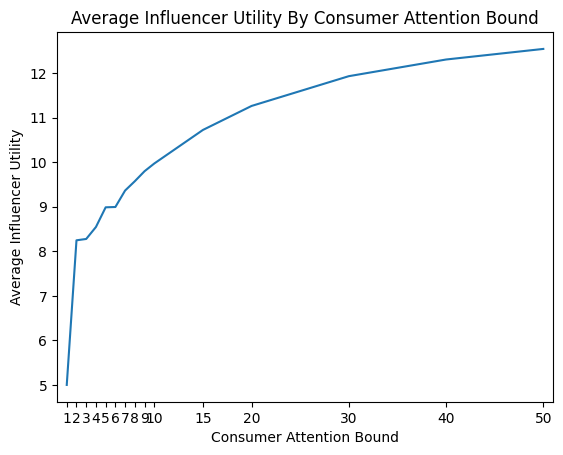

In [18]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", stats['average_influencer_utilities'], tests[varied_param], varied_param_x_label, 'Average Influencer Utility')

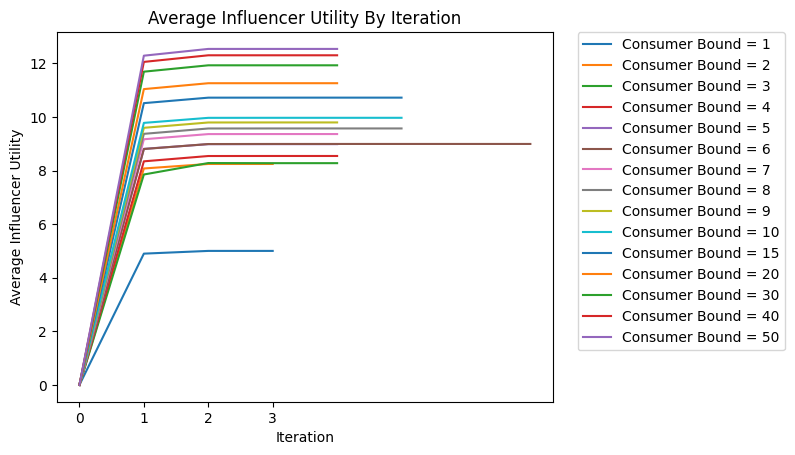

In [19]:
visualize.plot_value_by_iteration_by_test("Average Influencer Utility By Iteration", stats['average_influencer_utilities'], tests[varied_param], varied_param_legend_label, 'Average Influencer Utility')

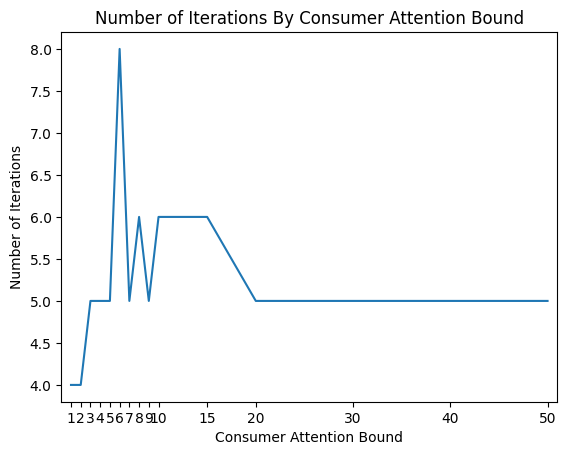

In [20]:
visualize.plot_ending_value_by_test(f"Number of Iterations By {varied_param_x_label}", stats['num_iterations'], tests[varied_param], varied_param_x_label, 'Number of Iterations')